# clean data

In [2]:
import pandas as pd
import os

#Reading file
cwd=os.getcwd()
filename=cwd+ '/default of credit card clients.xls'
nanDict = {}
df = pd.read_excel(filename, header=1, skiprows=0, index_col=0, na_values=nanDict)
df.rename(index=str, columns={"default payment next month": "def_payment","PAY_0":"PAY_1"}, inplace=True)


In [3]:
#DEFINE CATEGORICAL AND CONTINUOUS VARIABLES
#CHECK VALUES TO MAKE SURE THERE ARE APPROPRIATE
cat = ["SEX","EDUCATION","MARRIAGE", "PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
cont = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] 
#for i in (cat):
#    values_counts=df[i].value_counts()
#    print("These are the observed values for " + str(i) + ":")
#    print(values_counts)

In [4]:
sex = [1,2]
education = [1,2,3,4]
marriage = [1,2,3]
payment = [0,1]
df = df[df["SEX"].isin(sex)]
df = df[df['EDUCATION'].isin(education)]
df = df[df['MARRIAGE'].isin(marriage)]
df = df[df['def_payment'].isin(payment)]
#We observe undocumented values for repayment status variables: -2 and 0.
#PAY-->4030 remaining observations-->too many 0 and -2
#len(df) #29601 remaining observations
#print(df)

In [5]:
# MOVE BAD VALUES TO ZERO
pay_var =  ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for var in pay_var:
    vals = (df[var]== 0) | (df[var] == -2)
    df.loc[vals,var] = 0


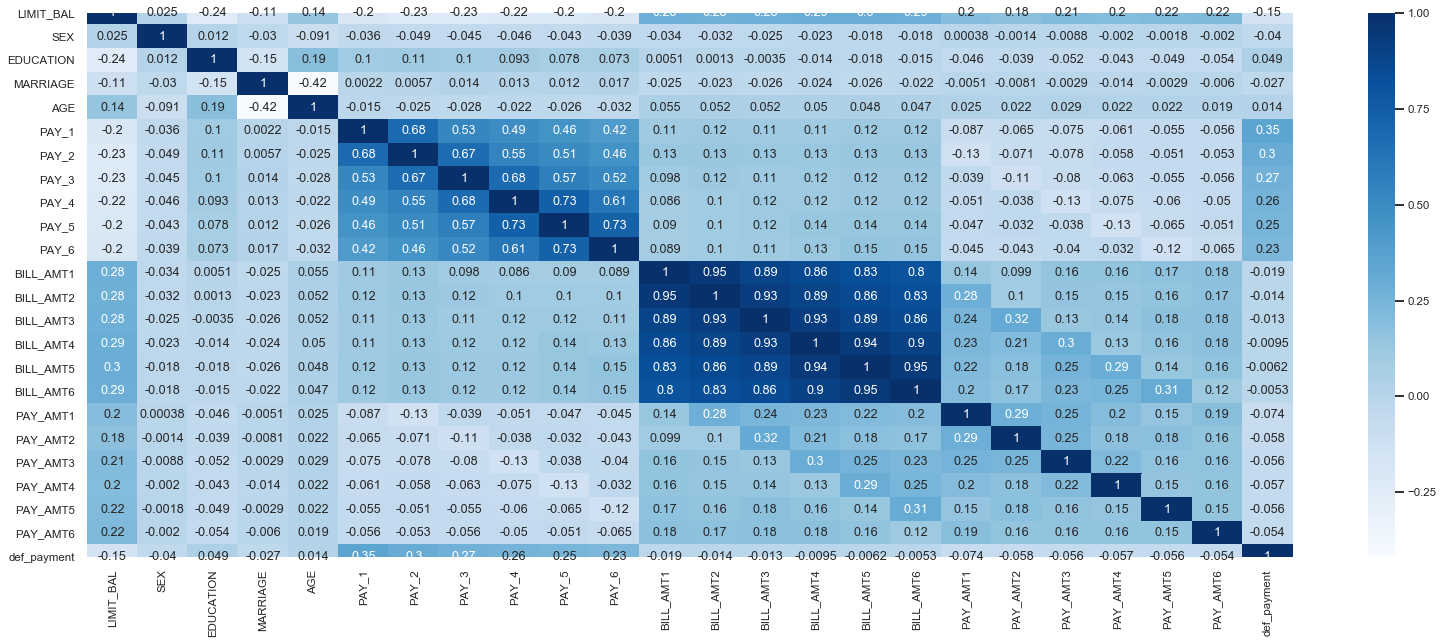

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#CORRELATION MATRIX UNSCALED
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
sns.heatmap(df.iloc[:,:].corr(), cmap='Blues', annot=True)

In [6]:
#SEPARATE TARGETS AND TEST DATA
data_x= df.loc[:, df.columns != 'def_payment']
target= df.loc[:, df.columns == 'def_payment']

# BRUTE FORCE APPROACH 

In [7]:
from logistic_regression import LogisticRegression
from activation_functions import Activation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
# PREPARE DATA FOR BRUTE FORCE LOGISTIC REGRESSION

X = data_x
y = target

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)

# scale continuous values
scaler = StandardScaler()
cont_train = X_train[cont]
cont_test = X_test[cont]
scaler.fit(cont_train)
cont_train = scaler.transform(cont_train)
cont_test = scaler.transform(cont_test)


X_train = np.c_[cont_train, X_train[cat].values]
X_test = np.c_[cont_test, X_test[cat].values]
y_train = y_train.values
y_test = y_test.values




In [11]:
# JUST A TEST
brute_force1 = LogisticRegression(X_train, y_train, X_test, y_test, ['SIGMOID'], eta = 0.001, lambd = 0.001, epochs = 1000, batchs = 20)
brute_force1.train()
brute_force1.predict()
score = brute_force1.score_binary()
results = np.c_[score, y_test]
print(results)
print(brute_force1.accuracy_metric(score,y_test))

[[0. 1.]
 [0. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 0.]
 [0. 0.]]
0.7941226144232393


In [12]:
#LOOP OVER HYPERPARAMETERS 
eta_vec = np.logspace(-5, 1, 7)
lam_vec = np.logspace(-5, 1, 7)
test_accuracy = np.zeros((len(eta_vec), len(lam_vec)))

for i, eta in enumerate(eta_vec):
    for j, lam in enumerate(lam_vec):
        bf = LogisticRegression(X_train, y_train, X_test, y_test, ['SIGMOID'], eta = eta, lambd = lam, epochs = 1000, batchs = 20)
        bf.train()
        bf.predict()
        pred = bf.score_binary()
        accuracy = bf.accuracy_metric(pred, y_test)
        test_accuracy[i][j] = accuracy


/Users/douglas/Fall_2019/FYS4155/project2/activation_functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/Users/douglas/Fall_2019/FYS4155/project2/logistic_regression.py:59: RuntimeWarning: overflow encountered in matmul
  return self.activation.func(np.matmul(a,b))
/Users/douglas/Fall_2019/FYS4155/project2/logistic_regression.py:59: RuntimeWarning: invalid value encountered in matmul
  return self.activation.func(np.matmul(a,b))
/Users/douglas/Fall_2019/FYS4155/project2/logistic_regression.py:84: RuntimeWarning: overflow encountered in multiply
  gradient += self._lam*self._beta
/Users/douglas/Fall_2019/FYS4155/project2/logistic_regression.py:98: RuntimeWarning: invalid value encountered in greater
  self._predict[np.where(self._predict > .5)] = 1
/Users/douglas/Fall_2019/FYS4155/project2/logistic_regression.py:85: RuntimeWarning: overflow encountered in multiply
  self._beta -= self._eta * gradient


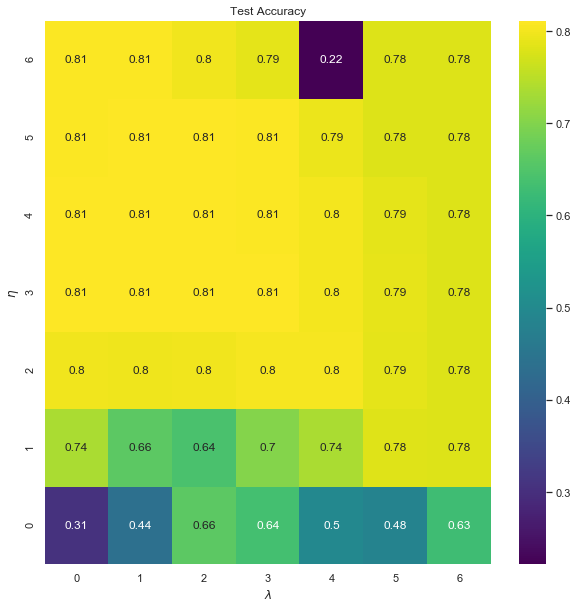

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
#PLOT OVER HYPERPARAMETERS BRUTE FORCE

sns.set()
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.ylim(0,7)
plt.show()

